<span style='font-family:B Nazanin;font-size:16px'>
ویروس کرونا یا کووید- 19یک نوع سندرم تنفسی حاد با عامل ویروسی از خانواده کرونا ویروسها میباشد که همهی کشورهای جهان را در مدت زمان کوتاهی درگیر کرده است. با توجه به شیوع و میزان مرگ و میر بالای این بیماری و از سوی دیگر، احتمال اوج مجدد کووید- 19خصوصاً به دلیل نبود درمان اختصاصی، آشنایی و بررسی اطلاعات مربوط به ویروس کووید- 19اهمیت زیادی دارد

<span style='font-family:B Nazanin;font-size:16px'>

# پیش پردازش 

<span style='font-family:B Nazanin;font-size:16px'>
پیش پردازش، یکی از مهمترین گامها در پروژههای داده کاوی است. رویکردهای مختلفی در زمینه ی مدیریت داده های گم شده و تبدیل داده ها به فرمتهای دیگر مورد استفاده قرار میگیرد و انتخاب دقیق این رویکردها تأثیر مستقیمی در کیفیت نتایج نهایی دارد؛ لذا همواره میبایست بهترین رویکرد را شناسایی و اعمال نمود. 

<span style='font-family:B Nazanin;font-size:18px'>

۱-۱ تعداد داده های گم شده در هر ویژگی را مشخص کنید. سپس، با ذکر دلیل، رویکرد مورد استفاده خود را برای پر کردن داده های گم شده در هر ستون مشخص کرده و اقدام به تکمیل داده های گم شده کنید.

Import Libraries

In [76]:
import numpy as np
import pandas as pd
import requests

#for visualization
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import missingno as msno

from persiantools.jdatetime import JalaliDate
import datetime
import jalali_pandas
from tqdm import tqdm

pd.options.mode.chained_assignment = None  # default='warn'

Load CSV File

In [77]:
file = "CA1_Dataset.csv"
df = pd.read_csv(file)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165631,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429,5393.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165632,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165633,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165634,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


<span style='font-family:B Nazanin;font-size:16px'>
به ازای هر ویژگی تعداد مقادیر خالی را میشماریم

In [78]:
with pd.option_context("display.max_rows", df.shape[0]+1):
    print(df.isna().sum())

iso_code                                           0
continent                                       9917
location                                           0
date                                               0
total_cases                                     3030
new_cases                                       3172
new_cases_smoothed                              5156
total_deaths                                   20843
new_deaths                                     20803
new_deaths_smoothed                            22902
total_cases_per_million                         3785
new_cases_per_million                           3927
new_cases_smoothed_per_million                  5905
total_deaths_per_million                       21585
new_deaths_per_million                         21545
new_deaths_smoothed_per_million                23638
reproduction_rate                              40569
icu_patients                                  142246
icu_patients_per_million                      

<AxesSubplot:>

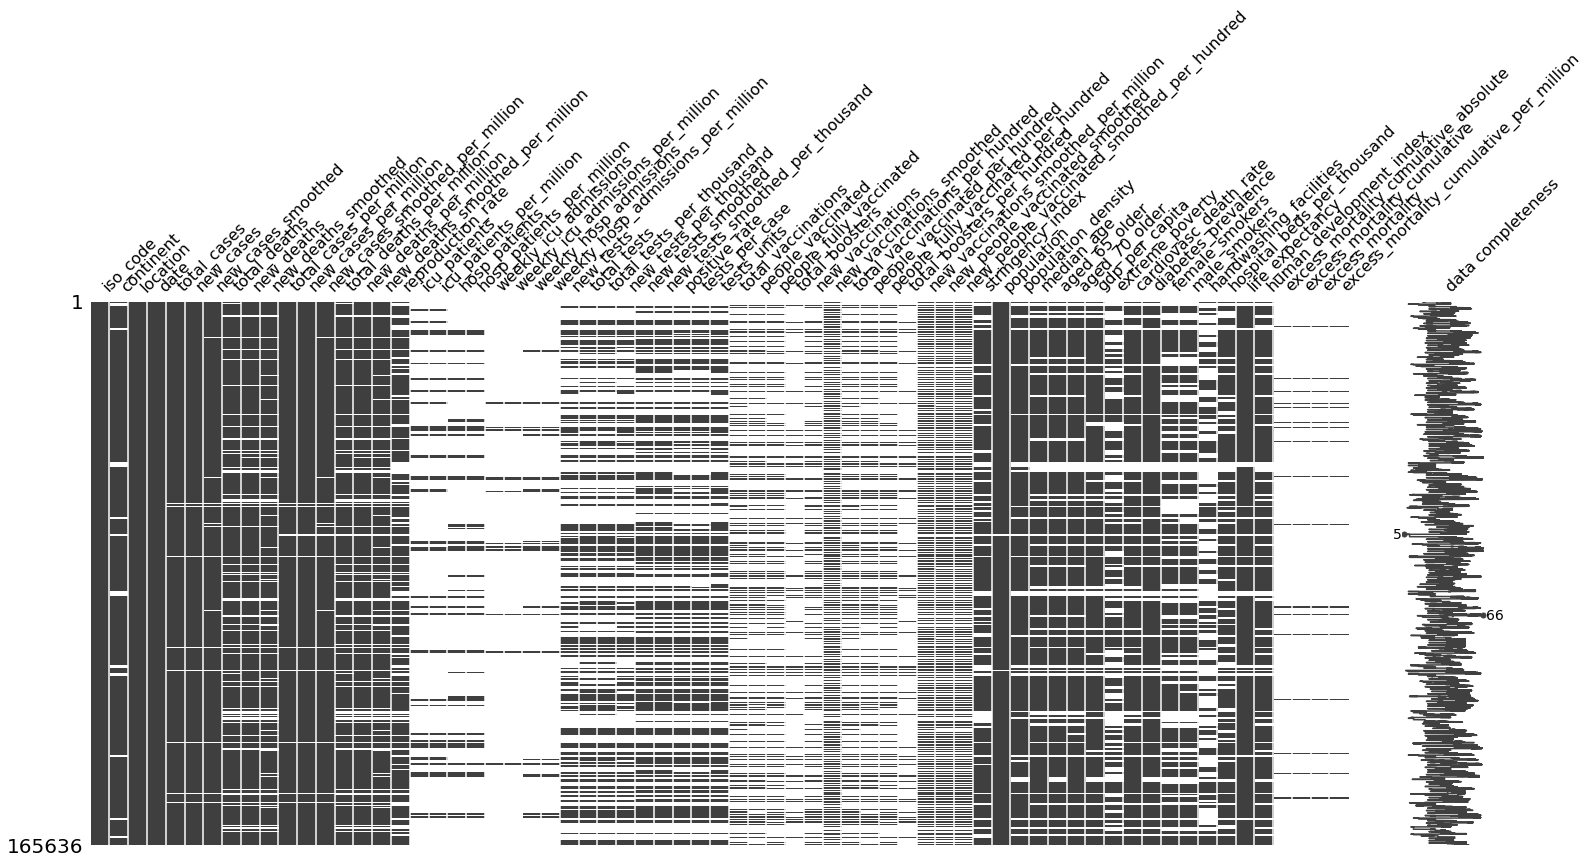

In [79]:
msno.matrix(df, labels=True)

<span style='font-family:B Nazanin;font-size:16px'>
ويژگی‌هایی که بیش از ۸۵٪ داده خالی دارند را حذف میکنیم. زیرا پر کردن آنها به ما داده پرت میدهد.

iso_code                                           0
continent                                       9917
location                                           0
date                                               0
total_cases                                     3030
new_cases                                       3172
new_cases_smoothed                              5156
total_deaths                                   20843
new_deaths                                     20803
new_deaths_smoothed                            22902
total_cases_per_million                         3785
new_cases_per_million                           3927
new_cases_smoothed_per_million                  5905
total_deaths_per_million                       21585
new_deaths_per_million                         21545
new_deaths_smoothed_per_million                23638
reproduction_rate                              40569
new_tests                                      98630
total_tests                                   

<AxesSubplot:>

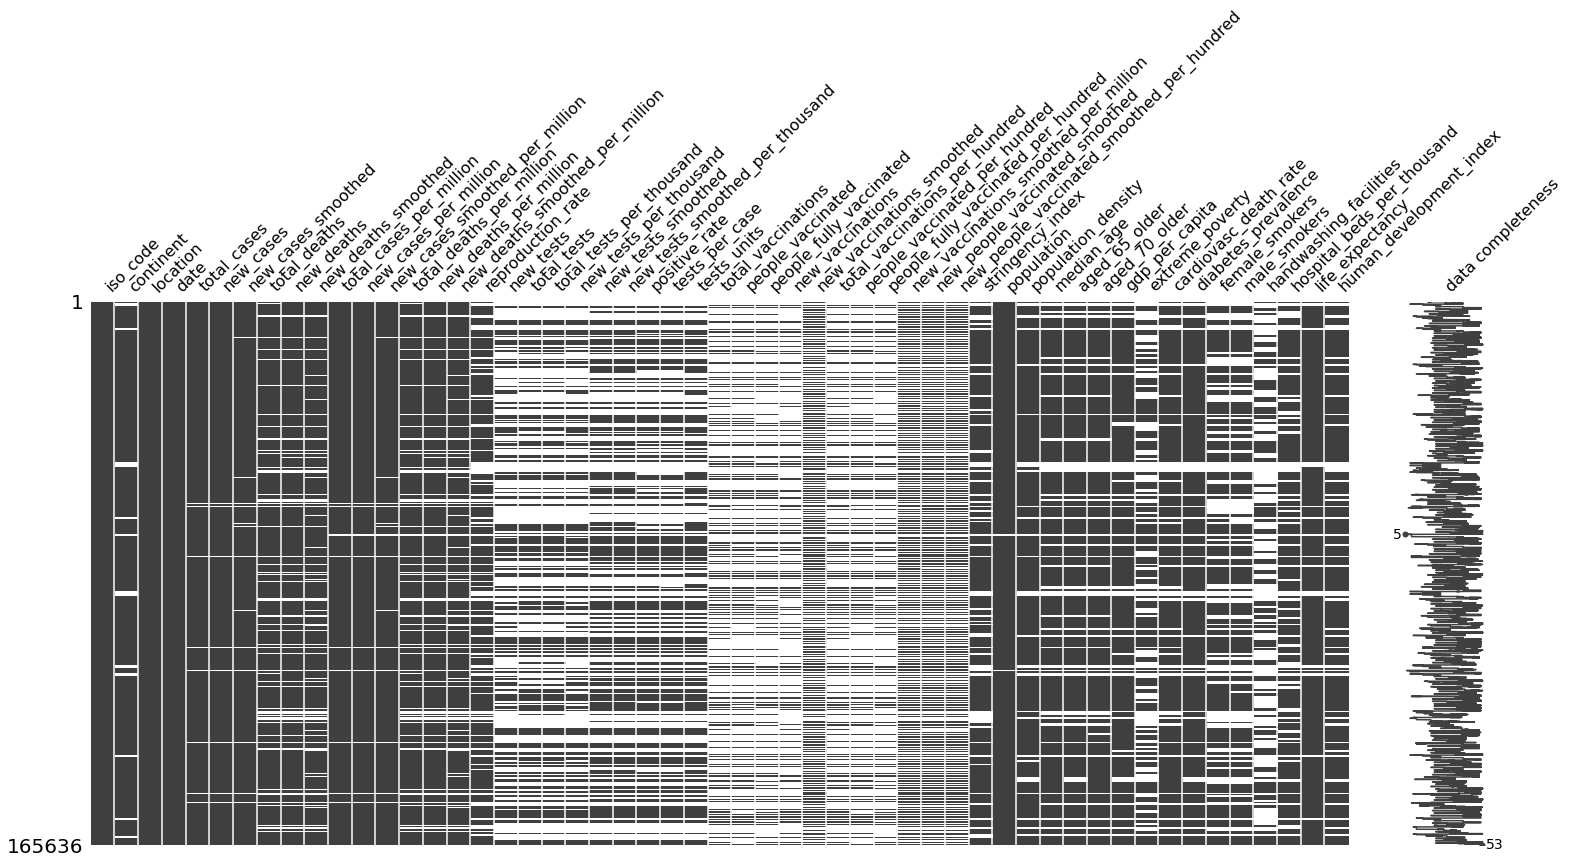

In [80]:
# Delete columns containing either 85% or more than 85% NaN Values
perc = 85.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, 
                thresh=min_count)

with pd.option_context("display.max_rows", mod_df.shape[0]+1):
    print(mod_df.isna().sum())
    
msno.matrix(mod_df, labels=True)

In [81]:
mod_df.interpolate(method="linear", limit_direction="forward")

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165631,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429,5393.0,1.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
165632,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
165633,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
165634,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


<span style='font-family:B Nazanin;font-size:16px'>
ویژگیهای مرتبط با واکسن را با روش backfill پر میکنیم زیرا این مقادیر در ابتدا تا کشف و توزیع واکسن صفر است.

<AxesSubplot:>

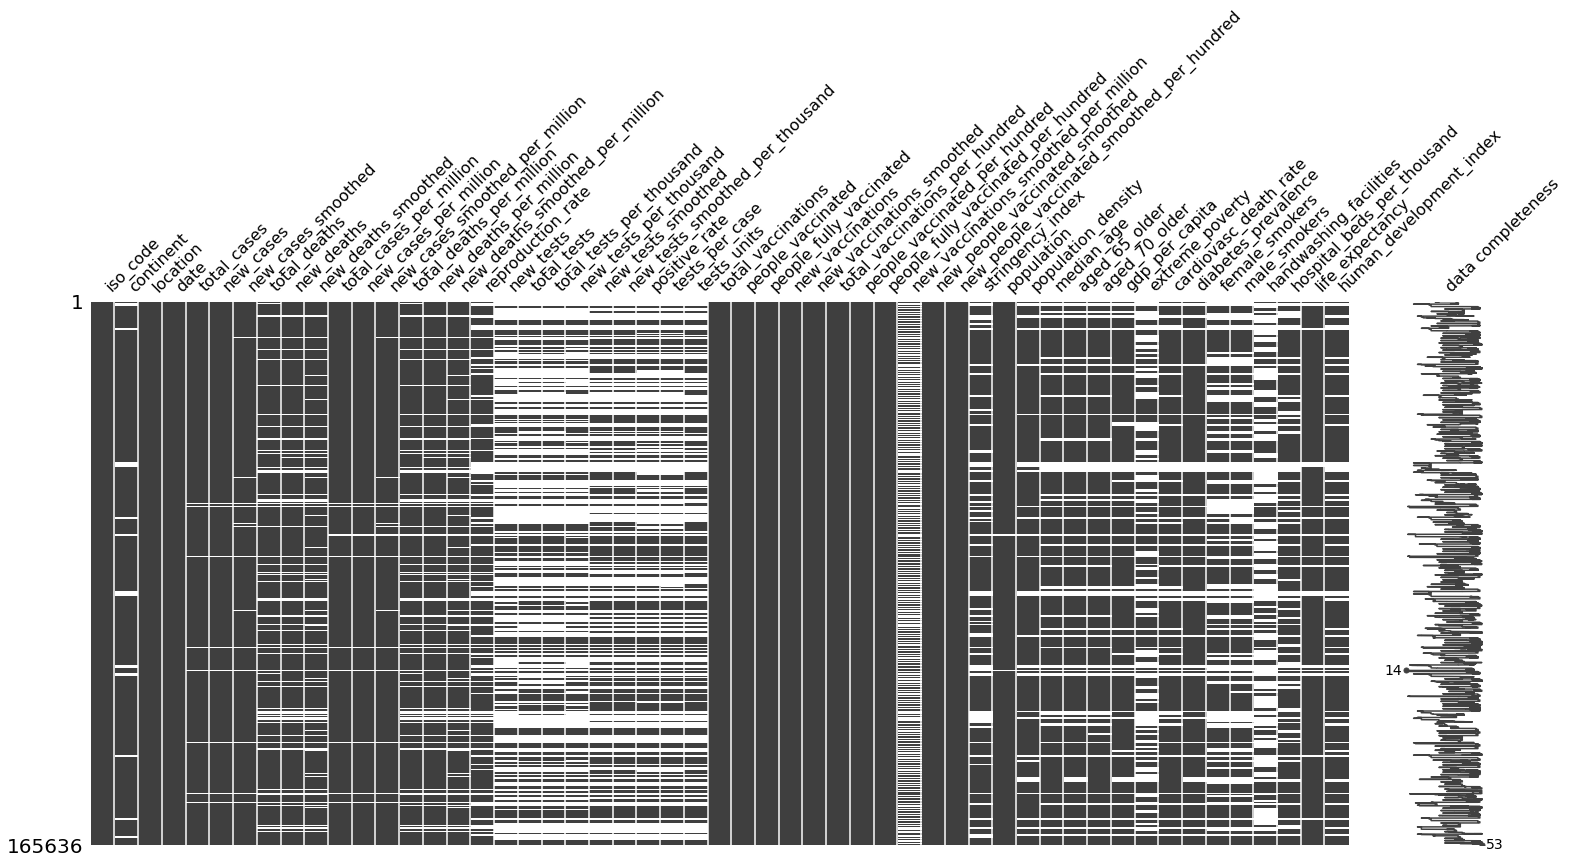

In [82]:
mod_df["new_vaccinations"] = mod_df["new_vaccinations"].fillna(method="bfill")
mod_df["total_vaccinations"]= mod_df["total_vaccinations"].fillna(method="bfill")
mod_df["people_vaccinated"] = mod_df["people_vaccinated"].fillna(method="bfill")
mod_df["people_fully_vaccinated"]= mod_df["people_fully_vaccinated"].fillna(method="bfill")
mod_df["new_vaccinations_smoothed"]= mod_df["new_vaccinations_smoothed"].fillna(method="bfill")
mod_df["total_vaccinations_per_hundred"]= mod_df["total_vaccinations_per_hundred"].fillna(method="bfill")
mod_df["people_vaccinated_per_hundred"]= mod_df["people_vaccinated_per_hundred"].fillna(method="bfill")
mod_df["people_fully_vaccinated_per_hundred"] = mod_df["people_fully_vaccinated_per_hundred"].fillna(method="bfill")
mod_df["new_people_vaccinated_smoothed"] = mod_df["new_people_vaccinated_smoothed"].fillna(method="bfill")
mod_df["new_people_vaccinated_smoothed_per_hundred"]= mod_df["new_people_vaccinated_smoothed_per_hundred"].fillna(method="bfill")



msno.matrix(mod_df, labels=True)

<span style='font-family:B Nazanin;font-size:16px'>
ستون‌های باقیمانده چون مقادیر آماری هستند مقادیر خالی آنها را به کمک میانگین‌گیری پر میکنیم. برای این کار ابتدا بر روی کشور میانگیری میکنیم و در مراحل بعد بر روی قاره و iso_code میانگین میگیریم و به جای مقادیر خالی باقیمانده میگذاریم.

In [83]:
# mod_df = mod_df.interpolate()
# mod_df.fillna(method ='bfill', inplace = True)
# mod_df.fillna(method ='ffill', inplace = True)


list_cols = list(mod_df.columns.values)
list_cols.remove('iso_code')
list_cols.remove('location')
list_cols.remove('date')
list_cols.remove('continent')
list_cols.remove('tests_units')

mean1 = mod_df.groupby('location').mean()
mean2 = mod_df.groupby('continent').mean()
mean3 = mod_df.groupby('iso_code').mean()


for col in tqdm(list_cols):
        mod_df[col] = mod_df.apply(
            lambda row: mean1[col][row["location"]] if pd.isna(row[col]) else row[col],
            axis=1
        )

for col in tqdm(list_cols):
        mod_df[col] = mod_df.apply(
            lambda row: mean2[col][row["continent"]] if pd.isna(row[col]) and not pd.isna(row["continent"]) else row[col],
            axis=1
        )
        
for col in tqdm(list_cols):
        mod_df[col] = mod_df.apply(
            lambda row: mean3[col][row["iso_code"]] if pd.isna(row[col]) else row[col],
            axis=1
        )

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [01:49<00:00,  2.29s/it]


iso_code                                          0
continent                                      9917
location                                          0
date                                              0
total_cases                                       0
new_cases                                         0
new_cases_smoothed                                0
total_deaths                                      0
new_deaths                                        0
new_deaths_smoothed                               0
total_cases_per_million                         755
new_cases_per_million                           755
new_cases_smoothed_per_million                  755
total_deaths_per_million                        755
new_deaths_per_million                          755
new_deaths_smoothed_per_million                 755
reproduction_rate                              9146
new_tests                                      9917
total_tests                                    9917
total_tests_

<AxesSubplot:>

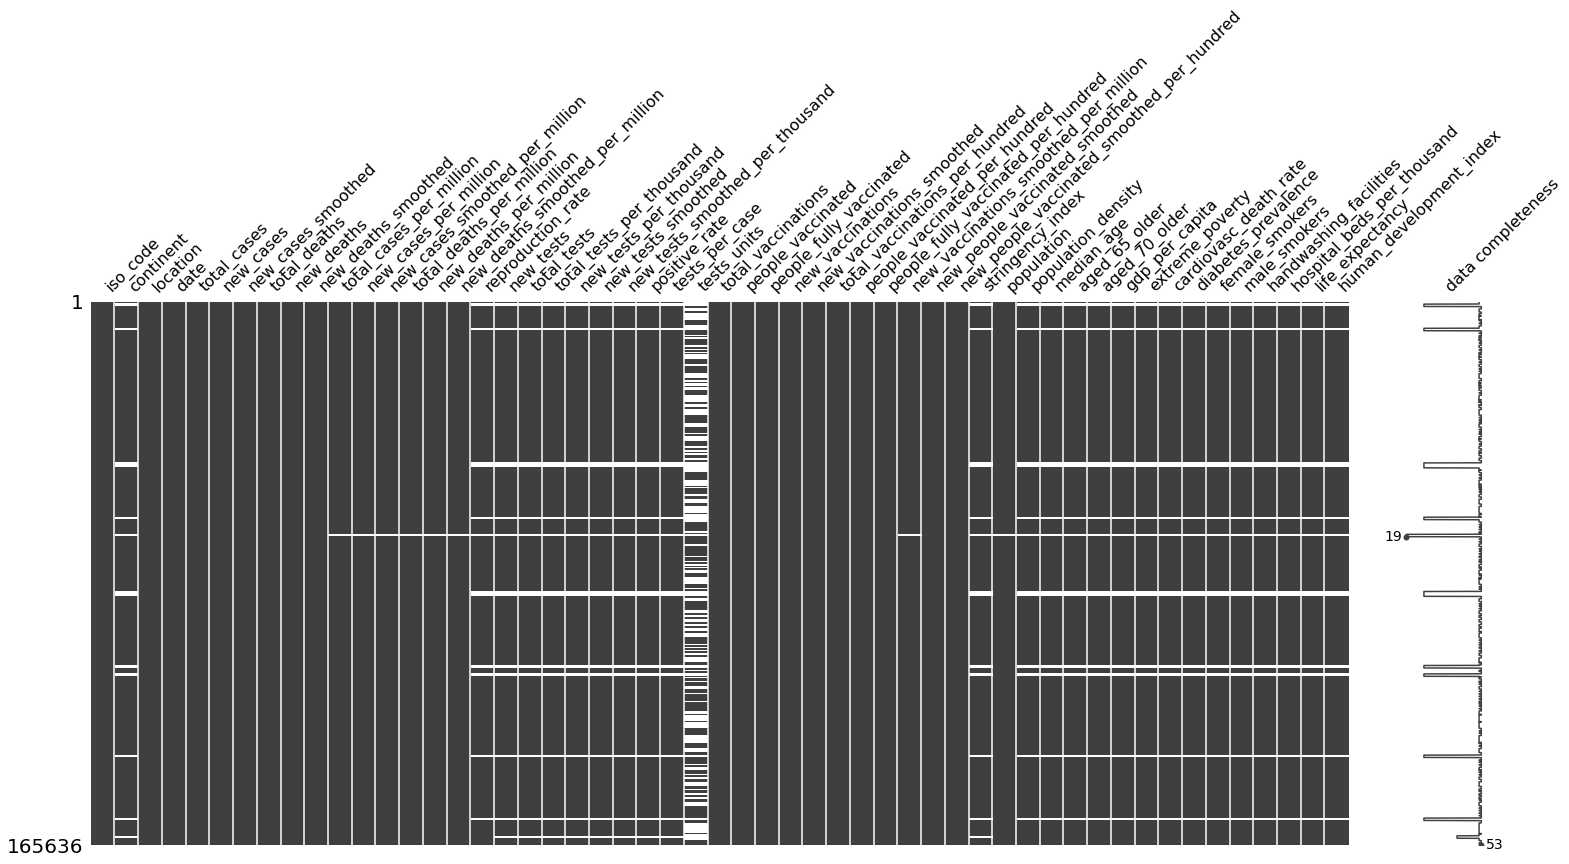

In [84]:
with pd.option_context("display.max_rows", mod_df.shape[0]+1):
    print(mod_df.isna().sum())
msno.matrix(mod_df, labels=True)

<span style='font-family:B Nazanin;font-size:16px'>
مقادیر ستون test_unit پس از این مراحل همچنان داده خالی زادی دارد و تصمیم بر حذف آن میگیریم.

C:\Users\mamat\AppData\Local\Temp/ipykernel_15300/2207112408.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  mod_df = mod_df.drop('tests_units', 1)


<AxesSubplot:>

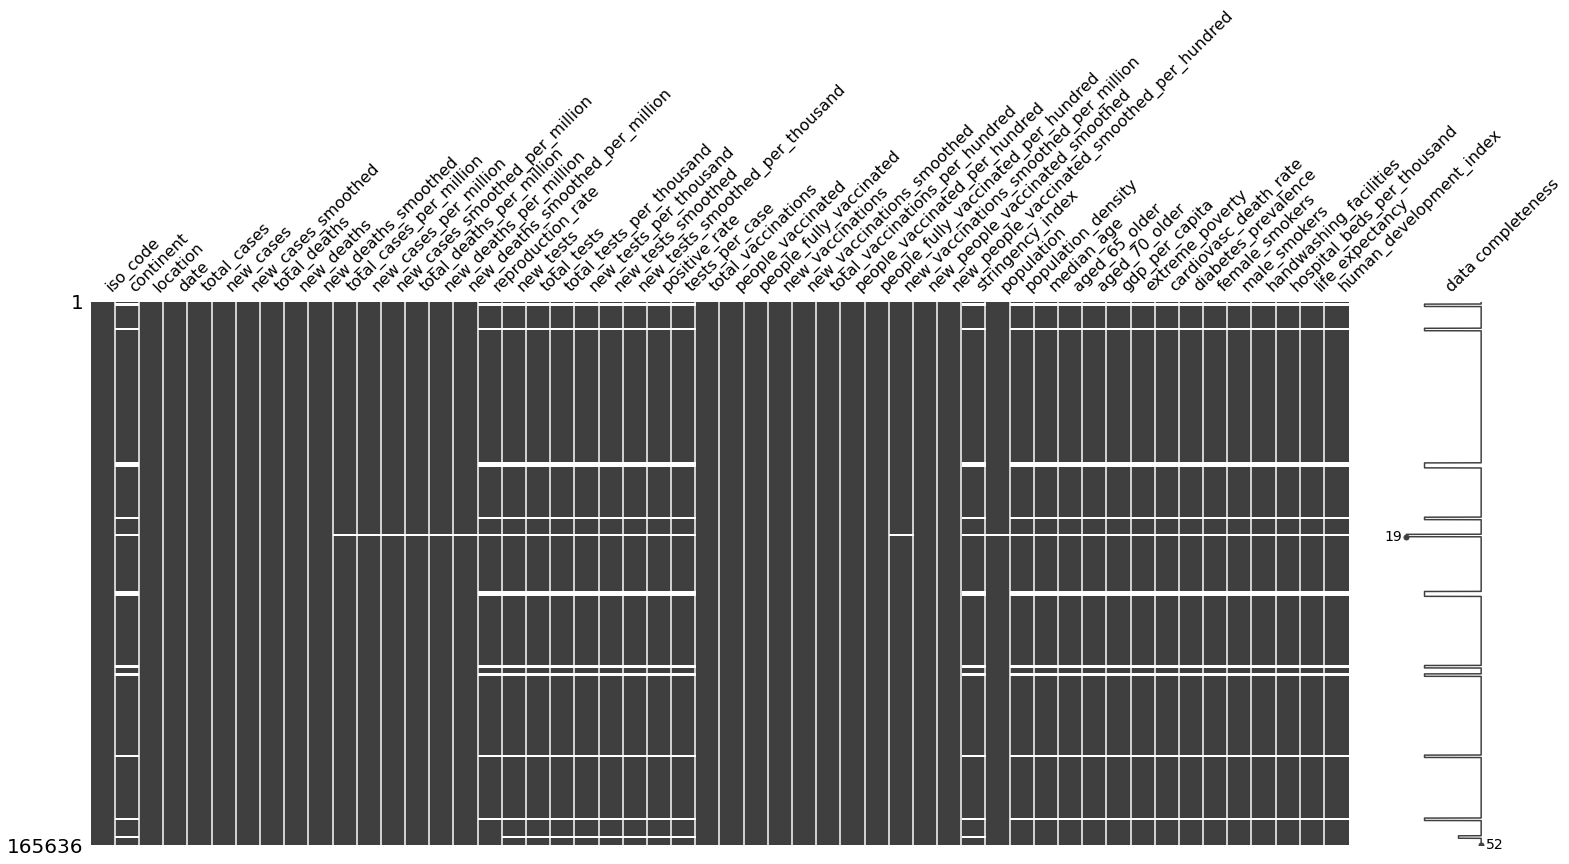

In [85]:
mod_df = mod_df.drop('tests_units', 1)
msno.matrix(mod_df, labels=True)

 <span style='font-family:B Nazanin;font-size:16px'>

۲-۱ دیتافریم دیگری درست نمایید که در آن، تعداد کیس‌های جدید، تعداد واکسینه‌های جدید، تعداد فوتیها و جمعیت برای هر کشور به صورت تجمیع شده محاسبه شده باشد. (محاسبه‌ی جمع داده‌ها از ابتدا تا آخرین تاریخ موجود در مجموعه داده‌ها برای هر کشور)

In [87]:
df1 = mod_df[["location", "new_cases", "new_vaccinations", "new_deaths", "population"]].groupby('location').sum()
df1


,new_cases,new_vaccinations,new_deaths,population
location,,,,
Afghanistan,1.745540e+05,2.974970e+06,7.917389e+03,2.939855e+10
Africa,1.123052e+07,5.818190e+08,2.486680e+05,1.028741e+12
Albania,2.767058e+05,3.002796e+06,3.546175e+03,2.117352e+09
Algeria,2.650790e+05,8.412034e+06,6.994856e+03,3.288245e+10
Andorra,3.824900e+04,1.605815e+06,1.552475e+02,5.654577e+07
...,...,...,...,...
Wallis and Futuna,4.540000e+02,0.000000e+00,1.008646e+01,5.547000e+06
World,4.390117e+08,1.122516e+10,5.946817e+06,6.071599e+12
Yemen,1.178904e+04,7.335200e+04,2.198542e+03,2.109952e+10


<span style='font-family:B Nazanin;font-size:16px'>

۳-۱ ستون جدیدی با اسم تاریخ شمسی ایجاد کنید و برای ایجاد آن، تاریخ میلادی را به شمسی تبدیل نمایید

In [88]:
from persiantools.jdatetime import JalaliDate
import datetime
import jalali_pandas

#for our local dataset
mod_df.date = pd.to_datetime(mod_df.date)
mod_df["shamsi_date"] = mod_df.date.jalali.to_jalali()
mod_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,shamsi_date
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,241.269979,3562.791549,10.728169,10.785301,...,5.680041,597.029,9.59,4.785682,39.6241,37.746,0.5,64.83,0.511,1398-12-05 00:00:00
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,241.269979,3562.791549,10.728169,10.785301,...,5.680041,597.029,9.59,4.785682,39.6241,37.746,0.5,64.83,0.511,1398-12-06 00:00:00
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,241.269979,3562.791549,10.728169,10.785301,...,5.680041,597.029,9.59,4.785682,39.6241,37.746,0.5,64.83,0.511,1398-12-07 00:00:00
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,241.269979,3562.791549,10.728169,10.785301,...,5.680041,597.029,9.59,4.785682,39.6241,37.746,0.5,64.83,0.511,1398-12-08 00:00:00
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,241.269979,3562.791549,10.728169,10.785301,...,5.680041,597.029,9.59,4.785682,39.6241,37.746,0.5,64.83,0.511,1398-12-09 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165631,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429000,5393.000000,1.000000,1.000000,...,21.400000,307.846,1.82,1.600000,30.7000,36.791,1.7,61.49,0.571,1400-12-07 00:00:00
165632,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143000,5393.000000,0.000000,1.000000,...,21.400000,307.846,1.82,1.600000,30.7000,36.791,1.7,61.49,0.571,1400-12-08 00:00:00
165633,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286000,5395.000000,2.000000,1.286000,...,21.400000,307.846,1.82,1.600000,30.7000,36.791,1.7,61.49,0.571,1400-12-09 00:00:00
165634,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000000,5395.000000,0.000000,1.000000,...,21.400000,307.846,1.82,1.600000,30.7000,36.791,1.7,61.49,0.571,1400-12-10 00:00:00


<span style='font-family:B Nazanin;font-size:16px'>

۴-۱ با توجه به تعداد بالای ویژگیها، آیا میتوان از تعداد ویژگیها کاست؟ (از معیار  correlationمیتوانید استفاده کنید.)

<AxesSubplot:xlabel='new_cases', ylabel='new_deaths'>

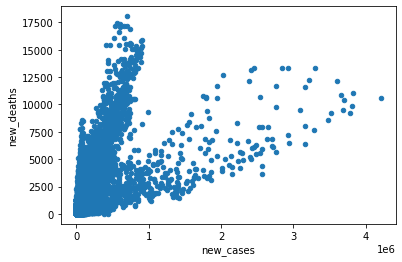

In [119]:
mod_df.plot.scatter(x='new_cases', y='new_deaths')

<AxesSubplot:xlabel='total_cases', ylabel='total_deaths'>

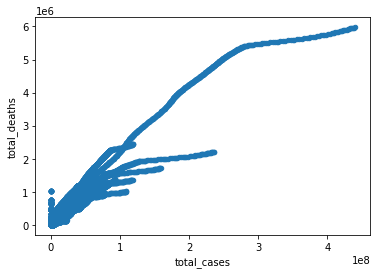

In [117]:
mod_df.plot.scatter(x='total_cases', y='total_deaths')

<span style='font-family:B Nazanin;font-size:16px'>

بله با توجه به نمودارهای scatter-plot بین ستون ها(فیچرها) میتوان در آنها همبستگی ها را شناسایی و آنهایی که با یکدیگر همبستگی دارند را بدست آورد و حذف نمود. باید توجه داشت که این همبستگی معنادار باشد و متغیر confounding بین دو ویژگی نباشد که باعث این همبستگی شده باشد.
    
شکل‌های بدست آمده به دلیل تخمین بودن داده‌ها بعضا ظاهر مناسبی ندارند ولی همبستگی میان آنها قابل تشخیص است. 

<span style='font-family:B Nazanin;font-size:16px'>

۵-۱ دیتافریم جدیدی درست نمایید که در آن صرفاً اطلاعات مربوط به کشور ایران قرار داده شده باشد

In [91]:
iran_df = mod_df.loc[mod_df['location'] == "Iran"]
iran_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,shamsi_date
71639,IRN,Asia,Iran,2020-02-19,2.0,2.0,9553.447185,2.0,2.0,185.360537,...,0.2,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1398-11-30 00:00:00
71640,IRN,Asia,Iran,2020-02-20,5.0,3.0,9553.447185,2.0,0.0,185.360537,...,0.2,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1398-12-01 00:00:00
71641,IRN,Asia,Iran,2020-02-21,18.0,13.0,9553.447185,4.0,2.0,185.360537,...,0.2,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1398-12-02 00:00:00
71642,IRN,Asia,Iran,2020-02-22,28.0,10.0,9553.447185,5.0,1.0,185.360537,...,0.2,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1398-12-03 00:00:00
71643,IRN,Asia,Iran,2020-02-23,43.0,15.0,9553.447185,8.0,3.0,185.360537,...,0.2,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1398-12-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72377,IRN,Asia,Iran,2022-02-26,7030943.0,7039.0,15065.429000,136390.0,224.0,227.429000,...,0.2,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-12-07 00:00:00
72378,IRN,Asia,Iran,2022-02-27,7040467.0,9524.0,14002.143000,136631.0,241.0,227.286000,...,0.2,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-12-08 00:00:00
72379,IRN,Asia,Iran,2022-02-28,7051429.0,10962.0,12838.143000,136838.0,207.0,223.143000,...,0.2,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-12-09 00:00:00
72380,IRN,Asia,Iran,2022-03-01,7060741.0,9312.0,11015.143000,137064.0,226.0,223.571000,...,0.2,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-12-10 00:00:00


<span style='font-family:B Nazanin;font-size:16px'>

۶-۱ در دیتافریم ایران، ستونی ایجاد نمایید که در آن، ماه به عنوان یک ویژگی مستقل در نظر گرفته شده است

In [92]:
iran_df['gregorian_month'] = pd.to_datetime(iran_df['date']).dt.month
iran_df["shamsi_month"] = iran_df.shamsi_date.jalali.month

iran_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,shamsi_date,gregorian_month,shamsi_month
71639,IRN,Asia,Iran,2020-02-19,2.0,2.0,9553.447185,2.0,2.0,185.360537,...,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1398-11-30 00:00:00,2,11
71640,IRN,Asia,Iran,2020-02-20,5.0,3.0,9553.447185,2.0,0.0,185.360537,...,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1398-12-01 00:00:00,2,12
71641,IRN,Asia,Iran,2020-02-21,18.0,13.0,9553.447185,4.0,2.0,185.360537,...,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1398-12-02 00:00:00,2,12
71642,IRN,Asia,Iran,2020-02-22,28.0,10.0,9553.447185,5.0,1.0,185.360537,...,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1398-12-03 00:00:00,2,12
71643,IRN,Asia,Iran,2020-02-23,43.0,15.0,9553.447185,8.0,3.0,185.360537,...,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1398-12-04 00:00:00,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72377,IRN,Asia,Iran,2022-02-26,7030943.0,7039.0,15065.429000,136390.0,224.0,227.429000,...,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-12-07 00:00:00,2,12
72378,IRN,Asia,Iran,2022-02-27,7040467.0,9524.0,14002.143000,136631.0,241.0,227.286000,...,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-12-08 00:00:00,2,12
72379,IRN,Asia,Iran,2022-02-28,7051429.0,10962.0,12838.143000,136838.0,207.0,223.143000,...,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-12-09 00:00:00,2,12
72380,IRN,Asia,Iran,2022-03-01,7060741.0,9312.0,11015.143000,137064.0,226.0,223.571000,...,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-12-10 00:00:00,3,12


<span style='font-family:B Nazanin;font-size:16px'>

۷-۱ دیتافریم جدیدی ایجاد نمایید که مجموعه داده ایران را بر اساس ماه در سال  2021تجمیع کند

In [93]:
iran2021_df = iran_df.loc[(iran_df['location'] == "Iran") & (iran_df['date'] > datetime.datetime(2021, 1,1))]
iran2021_df.groupby("gregorian_month").first()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,shamsi_date,shamsi_month
gregorian_month,,,,,,,,,,,,,,,,,,,,,
1,IRN,Asia,Iran,2021-01-02,1237474.0,6045.0,6073.000,55438.0,101.0,123.429,...,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1399-10-13 00:00:00,10
2,IRN,Asia,Iran,2021-02-01,1424596.0,6597.0,6472.857,58038.0,79.0,79.571,...,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1399-11-13 00:00:00,11
3,IRN,Asia,Iran,2021-03-01,1639679.0,8510.0,8200.571,60181.0,108.0,87.000,...,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1399-12-11 00:00:00,12
4,IRN,Asia,Iran,2021-04-01,1897314.0,11750.0,9498.714,62759.0,94.0,88.143,...,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-01-12 00:00:00,1
5,IRN,Asia,Iran,2021-05-01,2516157.0,17080.0,19874.000,72090.0,332.0,424.286,...,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-02-11 00:00:00,2
6,IRN,Asia,Iran,2021-06-01,2923823.0,10687.0,9775.286,80327.0,171.0,181.571,...,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-03-11 00:00:00,3
7,IRN,Asia,Iran,2021-07-01,3218860.0,14303.0,11247.286,84389.0,125.0,130.857,...,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-04-10 00:00:00,4
8,IRN,Asia,Iran,2021-08-01,3903519.0,32511.0,30298.143,90996.0,366.0,313.714,...,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-05-10 00:00:00,5
9,IRN,Asia,Iran,2021-09-01,5025233.0,33170.0,32693.714,108393.0,599.0,624.429,...,270.308,9.59,0.8,21.1,71.585913,1.5,76.68,0.783,1400-06-10 00:00:00,6


<span style='font-family:B Nazanin;font-size:16px'>

# نمایش دادگان
    
یکی از مواردی که در داده‌کاوی بسیار مورد استفاده قرار میگیرد، مصورسازی داده‌ها میباشد که به کمک آن میتوان درکی از مجموعه داده‌ی مورد نظر به دست آورد و همچنین، تحلیلهای کاملی بر اساس نمودارهای به دست آمده، ارائه نمود.

<span style='font-family:B Nazanin;font-size:16px'>

۱-۲ کدام کشورها بهترین و کدام کشورها بدترین عملکرد در مهار ویروس کرونا را داشته اند؟ با یک نمودار مناسب این مساله را بررسی نمایید و برداشت خود را از نتایج ذکر نمایید. (منظور از عملکرد، تعداد فوتی نسبت به کل جمعیت است.)

بهترین/بدترین کشورها با توجه به مرگ و میر نسبت به جمعیت آنها سنجیده میشوند برای اینکار مرگ و میر در میلیون نفر جمعیت را برای هر کشور جمع میزنیم و مقایسه میکنیم که نتایج در زیر مشاهده میشود


<AxesSubplot:xlabel='location'>

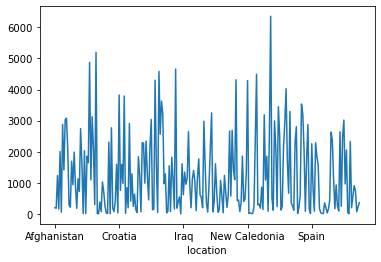

In [94]:
mod_df.groupby('location')["new_deaths_per_million"].sum().plot()

In [95]:
mod_df.groupby('location').sum().nsmallest(10, 'new_deaths_per_million')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
International,537473.0,721.000000,635.912610,1.094343e+04,15.262803,13.199164,0.000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000
Burundi,5707819.0,38127.000000,38414.181336,9.674151e+03,38.716981,38.185511,465738.016,3111.045000,3134.460259,789.595132,...,4.929620e+05,50333.400000,205733.736,4247.10,1810.426916,19252.018509,4313.088000,561.600000,43229.16,303.966
China,67919335.0,109850.433594,109912.280708,3.374058e+06,4658.125000,4714.270248,47028.511,76.068988,76.098728,2336.306000,...,1.180302e+07,539.700000,201924.129,7509.54,1464.900000,37316.400000,55192.738873,3346.140000,59297.61,586.731
Vanuatu,1962.0,19.000000,18.232864,4.780000e+02,1.512658,0.220497,6239.160,60.420000,57.966614,1520.040000,...,1.396673e+06,6309.600000,261131.400,5745.56,1338.400000,16491.000000,12049.902000,1361.439006,33684.66,291.102
New Zealand,3806317.0,167013.153425,106841.942820,2.053636e+04,58.386364,58.008083,742507.660,32579.629666,20841.922660,4006.195980,...,2.648701e+07,6528.740581,94536.998,5930.72,10863.200000,12624.800000,35185.560079,1915.740000,60400.86,683.354
Chad,2409357.0,7257.000000,7311.881381,9.611775e+04,201.275964,197.920159,142439.226,428.999000,432.273551,5682.487647,...,1.262461e+06,27417.600000,200630.430,4355.40,1841.374385,19581.112843,4154.052000,1075.518107,38727.36,284.172
Niger,2881815.0,8775.307584,8896.783443,1.079621e+05,309.168079,310.252504,114672.589,349.205770,354.009593,4296.039504,...,6.602380e+05,31728.500000,169935.707,1725.46,71.300000,10980.200000,6401.314000,213.900000,44505.46,280.922
South Sudan,5320426.0,16989.000000,17110.430081,6.346731e+04,145.340944,143.045599,467467.688,1492.699000,1503.395713,5576.380857,...,1.094212e+06,23616.814870,195700.175,7269.71,1797.532137,19114.895870,17668.982182,1049.910533,40321.45,301.801
Tajikistan,8652869.0,17786.000000,17834.917654,6.277812e+04,125.373692,120.052324,887507.874,1824.276000,1829.302398,6439.078484,...,1.943829e+06,3220.800000,286985.358,4770.81,3211.192527,26587.771112,48784.384000,3220.800000,47708.10,448.228


In [96]:
mod_df.groupby('location').sum().nlargest(10, 'new_deaths_per_million')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Peru,1.011461e+09,3.518721e+06,3.543039e+06,9.056462e+07,212036.318621,215182.747460,3.032010e+07,105479.104000,106208.087426,2.714814e+06,...,8.896085e+06,2544.500000,62343.885000,4325.650000,3489.600000,17950.285300,48005.540952,1163.200000,55789.98,564.879000
Bulgaria,2.272544e+08,1.096194e+06,1.098723e+06,8.975619e+06,35844.321330,35965.762535,3.295140e+07,158945.781000,159312.504312,1.301445e+06,...,1.345840e+07,1087.500000,307898.800000,4212.250000,21822.500000,32190.000000,68133.556179,5404.150000,54411.25,591.600000
Bosnia and Herzegovina,1.024036e+08,3.715530e+05,3.739922e+05,4.493398e+06,15899.109859,16033.568786,3.137886e+07,113852.503000,114599.942017,1.376882e+06,...,8.527716e+06,145.600000,239974.280000,7338.240000,21985.600000,34725.600000,70735.392000,2548.000000,56347.20,567.840000
Hungary,3.857990e+08,1.795580e+06,1.800467e+06,1.283320e+07,44871.615599,44972.626067,4.004489e+07,186376.342058,186883.625768,1.332052e+06,...,1.954762e+07,365.000000,203156.080000,5511.500000,19564.000000,25404.000000,68603.442773,5124.600000,56122.40,623.420000
Gibraltar,2.723664e+06,1.569660e+04,1.598372e+04,5.997362e+04,154.358491,155.007688,8.084248e+07,465898.823107,474420.556731,1.780108e+06,...,2.439241e+07,657.543011,167045.177693,4771.740762,17053.405681,25892.898981,68509.465454,3759.923676,58268.97,641.780913
North Macedonia,7.956426e+07,2.981950e+05,2.994287e+05,2.742471e+06,9353.721519,9396.204028,3.820317e+07,143179.804000,143772.175781,1.316811e+06,...,9.649854e+06,3680.000000,237498.368000,7418.880000,17217.155804,26141.527641,69167.306686,3150.080000,55788.80,569.664000
Montenegro,5.521087e+07,2.305120e+05,2.320334e+05,7.889604e+05,2709.489422,2727.381653,8.790826e+07,367027.520000,369449.963414,1.256204e+06,...,1.174905e+07,716.000000,277310.380000,7217.280000,31504.000000,34296.400000,67287.760309,2764.476000,55046.08,593.564000
Georgia,2.544243e+08,1.616159e+06,1.614808e+06,3.544215e+06,17114.636103,17152.595931,6.392935e+07,406093.267000,405753.886247,8.905572e+05,...,7.172378e+06,3091.200000,365216.448000,5232.960000,3900.800000,40848.000000,52687.231920,1913.600000,54294.72,597.632000
New Caledonia,2.803950e+06,5.558084e+04,5.468645e+04,1.721684e+05,1235.137931,1265.318500,9.728607e+06,192843.739271,189740.411350,5.973568e+05,...,9.512223e+06,6350.845742,265493.525529,16679.040000,11751.713174,23808.052096,34226.825472,2033.613913,55370.70,518.878527


<span style='font-family:B Nazanin;font-size:16px'>

۲-۲ میخواهیم تاثیر واکسیناسیون بر تعداد فوتی‌ها را بررسی کنیم. برای این کار فرض کنید الزام است که اطلاعات  5کشور را بررسی کنیم. شما کدام کشورها را برای مقایسه انتخاب میکنید؟ با یک نمودار مناسب این مساله را بررسی نمایید و برداشت خود را از نتایج ذکر نمایید.
    
۵ کشور انتخابی را کشورهایی با تعداد واکسینه بالا در نظر میگیریم زیرا هرچه آماره‌های بیشتری داشته باشیم، نتایج را بهتر میتوانیم مورد تحلیل و بررسی قرار دهیم. 

In [97]:
mod_df.groupby('location').sum().nlargest(20, 'new_vaccinations')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
World,9.749264e+10,4.390117e+08,4.380398e+08,1.988572e+09,5.946817e+06,5.971187e+06,1.238007e+07,55747.766000,55624.341251,2.525181e+05,...,1.192676e+07,7710.000000,179696.970,6561.21,4960.614,26703.585,46360.230000,2085.555,55959.18,568.227
Asia,2.795110e+10,1.178114e+08,1.168446e+08,4.073148e+08,1.351250e+06,1.355975e+06,5.974443e+06,25181.758000,24975.087659,8.706199e+04,...,0.000000e+00,0.000000,0.000,0.00,0.000,0.000,0.000000,0.000,0.00,0.000
Upper middle income,2.951138e+10,1.182120e+08,1.182281e+08,8.046135e+08,2.421471e+06,2.433284e+06,1.174034e+07,47027.610000,47034.001357,3.200948e+05,...,0.000000e+00,0.000000,0.000,0.00,0.000,0.000,0.000000,0.000,0.00,0.000
China,6.791934e+07,1.098504e+05,1.099123e+05,3.374058e+06,4.658125e+03,4.714270e+03,4.702851e+04,76.068988,76.098728,2.336306e+03,...,1.180302e+07,539.700000,201924.129,7509.54,1464.900,37316.400,55192.738873,3346.140,59297.61,586.731
Lower middle income,2.216595e+10,8.258872e+07,8.266932e+07,3.931400e+08,1.271503e+06,1.278279e+06,6.655138e+06,24796.550000,24820.753616,1.180369e+05,...,0.000000e+00,0.000000,0.000,0.00,0.000,0.000,0.000000,0.000,0.00,0.000
High income,4.534286e+10,2.363931e+08,2.353120e+08,7.971662e+08,2.211971e+06,2.217486e+06,3.732137e+07,194573.442000,193683.557035,6.561416e+05,...,0.000000e+00,0.000000,0.000,0.00,0.000,0.000,0.000000,0.000,0.00,0.000
India,1.274592e+10,4.294516e+07,4.326238e+07,1.785145e+08,5.372951e+05,5.317669e+05,9.147294e+06,30820.217000,31047.855898,1.281135e+05,...,4.903552e+06,16175.600000,215379.640,7927.57,1449.700,15717.800,45436.650000,404.390,53150.58,492.135
Europe,2.808516e+10,1.588156e+08,1.581429e+08,5.747552e+08,1.717056e+06,1.722691e+06,3.749872e+07,212047.251000,211149.210524,7.674014e+05,...,0.000000e+00,0.000000,0.000,0.00,0.000,0.000,0.000000,0.000,0.00,0.000
North America,2.282960e+10,9.319513e+07,9.369690e+07,5.053764e+08,1.374621e+06,1.379665e+06,3.826738e+07,156215.301000,157056.380643,8.471208e+05,...,0.000000e+00,0.000000,0.000,0.00,0.000,0.000,0.000000,0.000,0.00,0.000


In [98]:
isChina = mod_df['location']=='China'
df_china = mod_df[isChina]
df_china

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,shamsi_date
31401,CHN,Asia,China,2020-01-22,547.0,142.477865,142.558081,17.0,6.041667,6.114488,...,0.7,261.899,9.74,1.9,48.4,71.585913,4.34,76.91,0.761,1398-11-02 00:00:00
31402,CHN,Asia,China,2020-01-23,639.0,92.000000,142.558081,18.0,1.000000,6.114488,...,0.7,261.899,9.74,1.9,48.4,71.585913,4.34,76.91,0.761,1398-11-03 00:00:00
31403,CHN,Asia,China,2020-01-24,916.0,277.000000,142.558081,26.0,8.000000,6.114488,...,0.7,261.899,9.74,1.9,48.4,71.585913,4.34,76.91,0.761,1398-11-04 00:00:00
31404,CHN,Asia,China,2020-01-25,1399.0,483.000000,142.558081,42.0,16.000000,6.114488,...,0.7,261.899,9.74,1.9,48.4,71.585913,4.34,76.91,0.761,1398-11-05 00:00:00
31405,CHN,Asia,China,2020-01-26,2062.0,663.000000,142.558081,56.0,14.000000,6.114488,...,0.7,261.899,9.74,1.9,48.4,71.585913,4.34,76.91,0.761,1398-11-06 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32167,CHN,Asia,China,2022-02-26,109092.0,239.000000,197.857000,4636.0,0.000000,6.114488,...,0.7,261.899,9.74,1.9,48.4,71.585913,4.34,76.91,0.761,1400-12-07 00:00:00
32168,CHN,Asia,China,2022-02-27,109326.0,234.000000,210.714000,4636.0,0.000000,0.000000,...,0.7,261.899,9.74,1.9,48.4,71.585913,4.34,76.91,0.761,1400-12-08 00:00:00
32169,CHN,Asia,China,2022-02-28,109526.0,200.000000,219.571000,4636.0,0.000000,0.000000,...,0.7,261.899,9.74,1.9,48.4,71.585913,4.34,76.91,0.761,1400-12-09 00:00:00
32170,CHN,Asia,China,2022-03-01,109750.0,224.000000,222.286000,4636.0,0.000000,0.000000,...,0.7,261.899,9.74,1.9,48.4,71.585913,4.34,76.91,0.761,1400-12-10 00:00:00


<AxesSubplot:xlabel='total_vaccinations', ylabel='new_deaths'>

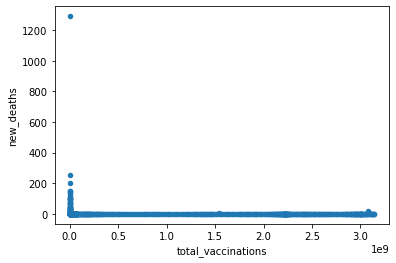

In [122]:
df_china.plot.scatter(x="total_vaccinations", y="new_deaths")

<AxesSubplot:xlabel='total_vaccinations', ylabel='new_deaths'>

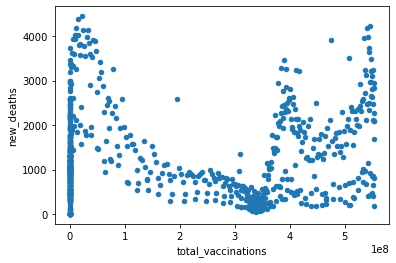

In [125]:
isUS = mod_df['location']=='United States'
df_us = mod_df[isUS]
df_us.plot.scatter(x="total_vaccinations", y="new_deaths")

<AxesSubplot:xlabel='total_vaccinations', ylabel='new_deaths'>

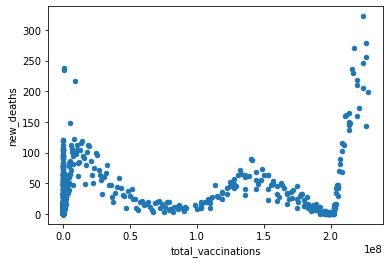

In [124]:
isJpn = mod_df['location']=='Japan'
df_Jpn = mod_df[isJpn]
df_Jpn.plot.scatter(x="total_vaccinations", y="new_deaths")

<span style='font-family:B Nazanin;font-size:16px'>

با توجه به تصاویر در کشور چین تاثیر واکسن بسیار زیاد بوده البته این تاثیر بعلت سخت گیری‌های شدید این کشور نیز هست. در مقایسه نمودار کشورهای آمریکا و ژاپن را میبینیم که تاثیر واکسن بر آنها بصورت متناوب بوده و در بازه‌هایی همبستگی منفی(کاهش آمار کرونا) بین آنها وجود دارد و در بازه‌هایی همبستگی مثبت(افزایش آمار کرونا)

<span style='font-family:B Nazanin;font-size:16px'>

۳-۲ قصد داریم سرعت واکسیناسیون در کشورهای مختلف را بررسی کنیم. برای این کار فرض کنید الزام ست که اطلاعات  5کشور را ارزیابی کنیم. شما کدام کشورها را برای مقایسه انتخاب میکنید؟ با یک نمودار مناسب این مساله را بررسی نمایید و برداشت خود را از نتایج ذکر نمایید
    
برای انتخاب کشورهای برتر برای سرعت واکسیناسیون، کشورهایی با آمار بالای تعداد افراد واکسینه شده در ۱۰۰ نفر را مورد بررسی قرار میدهیم.

In [100]:
mod_df.groupby('location').sum().nlargest(5, 'people_vaccinated_per_hundred')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Gibraltar,2723664.0,15696.595041,15983.719615,5.997362e+04,154.358491,155.007688,8.084248e+07,465898.823107,474420.556731,1.780108e+06,...,2.439241e+07,657.543011,167045.177693,4771.740762,17053.405681,25892.898981,68509.465454,3759.923676,58268.97,641.780913
China,67919335.0,109850.433594,109912.280708,3.374058e+06,4658.125000,4714.270248,4.702851e+04,76.068988,76.098728,2.336306e+03,...,1.180302e+07,539.700000,201924.129000,7509.540000,1464.900000,37316.400000,55192.738873,3346.140000,59297.61,586.731000
Saudi Arabia,278340103.0,746066.000000,750521.229974,4.359211e+06,9281.328632,9351.623730,7.875913e+06,21110.672000,21236.759931,1.233482e+05,...,3.585220e+07,4152.109754,189722.278000,12953.320000,1315.800000,18567.400000,52329.302356,1973.700000,54920.03,624.274000
United Arab Emirates,286274793.0,880970.000000,886244.333029,9.212383e+05,2465.587658,2484.191926,2.865303e+07,88175.626000,88703.526554,9.220605e+04,...,5.141222e+07,4339.551098,242829.760000,13186.640000,916.800000,28573.600000,54691.637483,916.800000,59569.08,679.960000
British Virgin Islands,839359.0,6085.000000,6128.742511,9.957738e+03,63.997072,63.683264,2.758962e+07,200013.150000,201450.575987,3.273096e+05,...,1.474815e+07,3962.306612,138808.210755,9637.350000,4955.459635,15707.921393,54711.969093,1628.832607,55744.35,533.746541


<AxesSubplot:>

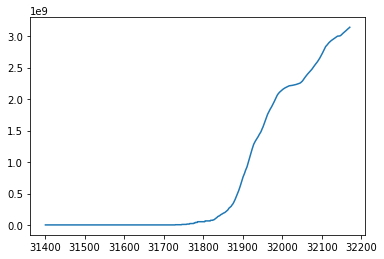

In [101]:
df_china["total_vaccinations"].plot()

<AxesSubplot:>

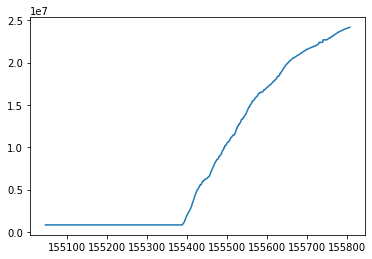

In [128]:
isUA = mod_df['location']=='United Arab Emirates'
df_UA = mod_df[isUA]
df_UA["total_vaccinations"].plot()

<AxesSubplot:>

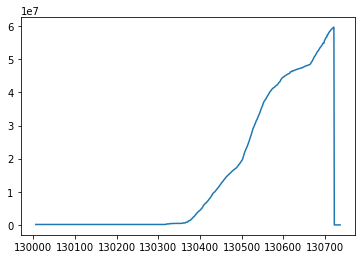

In [129]:
isSA = mod_df['location']=='Saudi Arabia'
df_SA = mod_df[isSA]
df_SA["total_vaccinations"].plot()

<span style='font-family:B Nazanin;font-size:16px'>

۴-۲ روند سختگیری در حوزه‌ی کرونا در ایران را در طول زمان بررسی کنید، توجه نمایید برای پاسخگویی به این سوال براساس تحلیل خود میتوانید از ویژگی یا ویژگیهای دلخواه استفاده نمایید، تحلیل خود را بیان نمایید.

به صورت کلی سخت گیریها در ابتدا کم و به مرور زیاد شده و در ادامه پس از مدتی کمتر شده است (ولی از حالت ابتدایی همچنان بالاتر) همچنین بازه‌هایی وجود دارند که بسیار پایین آمده که احتمالا مربوط به زمانهایی است که در کرونا سهل انگاری انجام میشد

<AxesSubplot:>

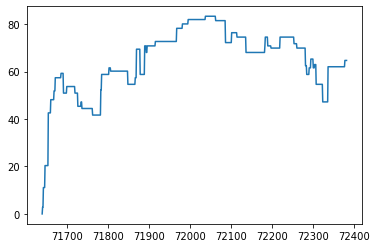

In [102]:
iran_df["stringency_index"].plot()

<span style='font-family:B Nazanin;font-size:16px'>

۵-۲ با استفاده از دیتافریم تجمیع شده ای که ایجاد کردید، برای ویژگی تعداد فوتیهای هر کشور نمودار BoxPlotرسم کنید و کشورهای پرت را شناسایی کنید و رویکرد مناسبی برای آنها اتخاذ نمایید. با توجه به مقدار میانه و میانگین، چولگی نمودار به کدام سمت میباشد؟

<AxesSubplot:title={'center':'Number of deaths in countries'}>

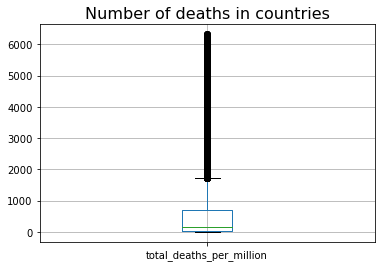

In [103]:
boxplot = mod_df.boxplot(column=['total_deaths_per_million'])
plt.title('Number of deaths in countries', fontsize=16)
boxplot

<span style='font-family:B Nazanin;font-size:16px'>

۶-۲ تاثیر ویژگیهای تراکم جمعیت، میانگین سنی، وجود امکانات بهداشتی، تعداد تخت بیمارستانها و شاخص پیشرفت انسانی را بر تعداد فوتیها و تعداد کیسهای جدید با رسم نمودار مناسب بررسی کنید

<AxesSubplot:xlabel='median_age', ylabel='total_cases_per_million'>

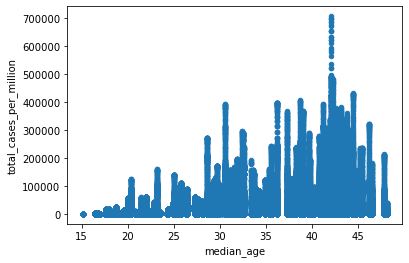

In [104]:
mod_df.plot.scatter(x='median_age',
                   y='total_cases_per_million')

<span style='font-family:B Nazanin;font-size:16px'>

با توجه به نمودار هرچه میانگین سنی بالا میرود تعداد مبتلایان نیز افزایش پیدا میکند.

<AxesSubplot:xlabel='handwashing_facilities', ylabel='total_cases_per_million'>

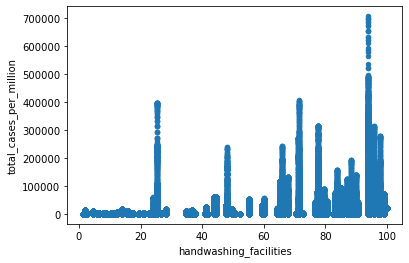

In [105]:

mod_df.plot.scatter(x='handwashing_facilities',
                   y='total_cases_per_million')

<span style='font-family:B Nazanin;font-size:16px'>
آمار در این ویژگی دقت بالایی ندارد ولی میتوان کفت به صورت میانگین کشورهایی که آمار بالاتری داشته اند امکانات بهداشتی بیشتری فراهم کرده‌اند

<AxesSubplot:xlabel='human_development_index', ylabel='total_cases_per_million'>

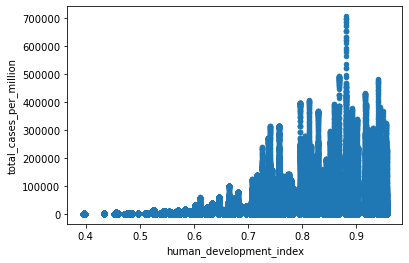

In [106]:

mod_df.plot.scatter(x='human_development_index',
                   y='total_cases_per_million')

<span style='font-family:B Nazanin;font-size:16px'>
با توجه به نمودار تعداد مبتلایان در کشورهای توسعه یافته بیشتر از کشورهای توسعه نیافته است.

<AxesSubplot:xlabel='hospital_beds_per_thousand', ylabel='total_cases_per_million'>

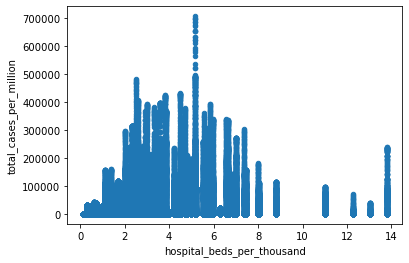

In [107]:

mod_df.plot.scatter(x='hospital_beds_per_thousand',
                   y='total_cases_per_million')

<span style='font-family:B Nazanin;font-size:16px'>

۷-۲ رابطه بین وضعیت اقتصادی کشورها و تعداد افراد واکسینه شده را بررسی کنید و تحلیل خود را بیان نمایید

<AxesSubplot:xlabel='gdp_per_capita', ylabel='people_vaccinated_per_hundred'>

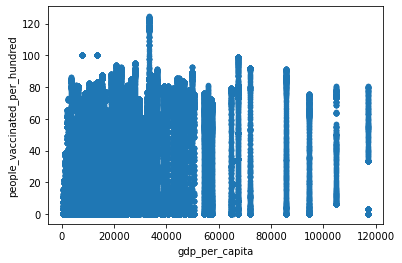

In [108]:
mod_df.plot.scatter(x='gdp_per_capita',
                   y='people_vaccinated_per_hundred')

<span style='font-family:B Nazanin;font-size:16px'>
تولید ناخالص داخلی معیار پولی ارزش بازار همه کالاها و خدمات نهایی تولید شده در یک دوره زمانی خاص توسط کشورها است. با توجه به نمودار میتوان به صورت میانگین گفت که این معیار تاثیر به سزایی در تعداد افراد واکسینه شده در کشور ندارد.

<AxesSubplot:xlabel='extreme_poverty', ylabel='people_vaccinated_per_hundred'>

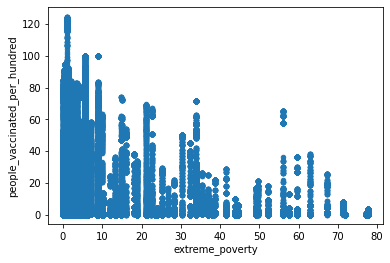

In [109]:
mod_df.plot.scatter(x='extreme_poverty',
                   y='people_vaccinated_per_hundred')

<span style='font-family:B Nazanin;font-size:16px'>
با توجه به نمودار میتوان کفت هرچه فقر مطلق در کشوری بیشتر باشد تعداد افراد واکسینه شده در آن نیز کمتر است.

<span style='font-family:B Nazanin;font-size:16px'>

۸-۲ در سال  2021توزیع تعداد مبتلایان به تفکیک ماه را بررسی نمایید و تحلیل خود را ذکر نمایید

<AxesSubplot:xlabel='gregorian_month'>

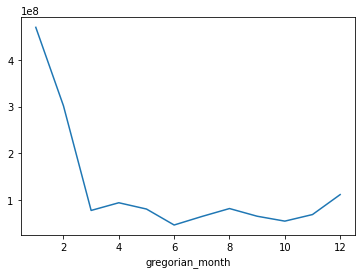

In [116]:
mod_df['gregorian_month'] = pd.to_datetime(mod_df['date']).dt.month
mod2021_df = mod_df.loc[mod_df["date"] > datetime.datetime(2021, 1,1)]
tmp = mod2021_df.groupby("gregorian_month").sum()
tmp["new_cases"].plot()

<span style='font-family:B Nazanin;font-size:16px'>
آمار کیس‌های جدید کرونا در ابتدای شیوع بسیار بالا بوده و سپس کاهش یافته و پس از آن بصورت متناوب دچار پیک ها و کاهش‌هایی شده است.